## Download BoardEx-boardchars via WRDS

-------------------------

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import wrds
import matplotlib.pyplot as plt
pd.options.display.max_columns=200

-------------

### Connect WRDS

In [2]:
conn=wrds.Connection()

Enter your WRDS username [yjaey]: yjaeyoon
Enter your password: ···············


WRDS recommends setting up a .pgpass file.


Create .pgpass file now [y/n]?:  y


Created .pgpass file successfully.
Loading library list...
Done


### Get variable list

In [3]:
bdex_tables= conn.list_tables('boardex')
print("The number of tables in BoardEx:", len(bdex_tables))

The number of tables in BoardEx: 174


In [4]:
for idx, table in enumerate(bdex_tables):
    if 'na_' in table:
        print(idx, table)

47 na_board_characteristics
48 na_board_dir_announcements
49 na_board_dir_committees
50 na_board_education_assoc
51 na_board_listed_assoc
52 na_board_nfp_assoc
53 na_board_other_assoc
54 na_board_unlisted_assoc
55 na_company_profile_advisors
56 na_company_profile_details
57 na_company_profile_market_cap
58 na_company_profile_sr_mgrs
59 na_company_profile_stocks
60 na_dir_characteristics
61 na_dir_education_assoc
62 na_dir_listed_assoc
63 na_dir_nfp_assoc
64 na_dir_other_assoc
65 na_dir_profile_achievements
66 na_dir_profile_details
67 na_dir_profile_education
68 na_dir_profile_emp
69 na_dir_profile_other_activ
70 na_dir_standard_remun
71 na_dir_unlisted_assoc
72 na_ltip_compensation
73 na_ltip_wealth
74 na_options_compensation
75 na_options_wealth
76 na_wrds_board_char_overall
77 na_wrds_company_dir_names
78 na_wrds_company_director_names
79 na_wrds_company_names
80 na_wrds_company_networks
81 na_wrds_company_profile
82 na_wrds_company_region
83 na_wrds_dir_profile_all
84 na_wrds_dir_p

In [5]:
for idx, table in enumerate(bdex_tables):
    if 'na_' in table and 'board' in table:
        print(idx, table)

47 na_board_characteristics
48 na_board_dir_announcements
49 na_board_dir_committees
50 na_board_education_assoc
51 na_board_listed_assoc
52 na_board_nfp_assoc
53 na_board_other_assoc
54 na_board_unlisted_assoc
76 na_wrds_board_char_overall


<b><font color='red'>Seems that there are two datasets for board characteristics <font></b>
- na_board_characteristics
- na_wrds_board_char_overall

This code quickly checks which one is more usable.

------------------

### Check the variables from the two sets

In [6]:
bd_chars= conn.describe_table(library='boardex', table='na_board_characteristics')
print(len(bd_chars))

Approximately 462228 rows in boardex.na_board_characteristics.
29


In [14]:
bd_chars.name

0                 boardname
1                   rowtype
2                 attrition
3              attrition3yr
4               genderratio
5                   boardid
6           clientcompanyid
7            timeretirement
8                  timerole
9                   timebrd
10                 timeinco
11             avgtimeothco
12             totnolstdbrd
13           totnounlstdbrd
14          totnoothlstdbrd
15         totcurrnolstdbrd
16       totcurrnounlstdbrd
17      totcurrnoothlstdbrd
18                  noquals
19               succession
20           nationalitymix
21          numberdirectors
22             stdevtimebrd
23            stdevtimeinco
24        stdevtotnolstdbrd
25    stdevtotcurrnolstdbrd
26             stdevnoquals
27                 stdevage
28         annualreportdate
Name: name, dtype: object

In [11]:
w_bd_chars= conn.describe_table(library='boardex', table='na_wrds_board_char_overall')
print(len(w_bd_chars))

Approximately 88475 rows in boardex.na_wrds_board_char_overall.
29


In [13]:
w_bd_chars.name

0                 boardname
1                   rowtype
2                   boardid
3           clientcompanyid
4            timeretirement
5                  timerole
6                   timebrd
7                  timeinco
8              avgtimeothco
9              totnolstdbrd
10           totnounlstdbrd
11          totnoothlstdbrd
12         totcurrnolstdbrd
13       totcurrnounlstdbrd
14      totcurrnoothlstdbrd
15                  noquals
16               succession
17                attrition
18             attrition3yr
19              genderratio
20           nationalitymix
21          numberdirectors
22             stdevtimebrd
23            stdevtimeinco
24         stdevtotnolstbrd
25    stdevtotcurrnolstdbrd
26             stdevnoquals
27                 stdevage
28         annualreportdate
Name: name, dtype: object

Two datasets include the same columns, but Ns are different.

--------

### Get data

### Select variables to download

In [15]:
vars_to_keep= ['boardname', 'rowtype', 'boardid', 'numberdirectors', 'genderratio', 'annualreportdate']

### Pilot check

In [16]:
df_test= conn.get_table(library= 'boardex', table='na_board_characteristics',
                       columns= vars_to_keep,
                       obs= 13).sort_values(['boardid', 'annualreportdate'])
df_test

,boardname,rowtype,boardid,numberdirectors,genderratio,annualreportdate
0,1 800 CONTACTS INC (De-listed 09/2007),ED Board Characteristics,3.0,2.0,1.000,2003-12-01
4,1 800 CONTACTS INC (De-listed 09/2007),SD Board Characteristics,3.0,7.0,1.000,2003-12-01
8,1 800 CONTACTS INC (De-listed 09/2007),Overall Board Characteristics,3.0,9.0,1.000,2003-12-01
1,1 800 CONTACTS INC (De-listed 09/2007),ED Board Characteristics,3.0,2.0,1.000,2004-12-01
5,1 800 CONTACTS INC (De-listed 09/2007),SD Board Characteristics,3.0,6.0,1.000,2004-12-01
9,1 800 CONTACTS INC (De-listed 09/2007),Overall Board Characteristics,3.0,8.0,1.000,2004-12-01
2,1 800 CONTACTS INC (De-listed 09/2007),ED Board Characteristics,3.0,2.0,1.000,2005-12-01
6,1 800 CONTACTS INC (De-listed 09/2007),SD Board Characteristics,3.0,5.0,1.000,2005-12-01
10,1 800 CONTACTS INC (De-listed 09/2007),Overall Board Characteristics,3.0,7.0,1.000,2005-12-01
3,1 800 CONTACTS INC (De-listed 09/2007),ED Board Characteristics,3.0,2.0,1.000,2006-12-01


In [17]:
df_test= conn.get_table(library= 'boardex', table='na_wrds_board_char_overall',
                       columns= vars_to_keep,
                       obs= 5).sort_values(['boardid', 'annualreportdate'])
df_test

,boardname,rowtype,boardid,numberdirectors,genderratio,annualreportdate
2,1 800 CONTACTS INC (De-listed 09/2007),Overall Board Characteristics,3.0,9.0,None,2003-12-01
0,1 800 CONTACTS INC (De-listed 09/2007),Overall Board Characteristics,3.0,8.0,None,2004-12-01
3,1 800 CONTACTS INC (De-listed 09/2007),Overall Board Characteristics,3.0,7.0,None,2005-12-01
1,1 800 CONTACTS INC (De-listed 09/2007),Overall Board Characteristics,3.0,8.0,None,2006-12-01
4,1-800-FLOWERS.COM INC,Overall Board Characteristics,6.0,8.0,None,2006-07-01


Data set 1 - Three row types (ED, SD, Overall)  
Data set 2 - One row type (Overall)

------------

### Download all observations

In [18]:
bd_chars= conn.get_table(library= 'boardex', table='na_board_characteristics',
                       columns= vars_to_keep).sort_values(['boardid', 'annualreportdate'])
print(bd_chars.shape)
bd_chars.head()

(462228, 6)


,boardname,rowtype,boardid,numberdirectors,genderratio,annualreportdate
0,1 800 CONTACTS INC (De-listed 09/2007),ED Board Characteristics,3.0,2.0,1.0,2003-12-01
4,1 800 CONTACTS INC (De-listed 09/2007),SD Board Characteristics,3.0,7.0,1.0,2003-12-01
8,1 800 CONTACTS INC (De-listed 09/2007),Overall Board Characteristics,3.0,9.0,1.0,2003-12-01
1,1 800 CONTACTS INC (De-listed 09/2007),ED Board Characteristics,3.0,2.0,1.0,2004-12-01
5,1 800 CONTACTS INC (De-listed 09/2007),SD Board Characteristics,3.0,6.0,1.0,2004-12-01


In [19]:
w_bd_chars= conn.get_table(library= 'boardex', table='na_wrds_board_char_overall',
                       columns= vars_to_keep).sort_values(['boardid', 'annualreportdate'])
print(w_bd_chars.shape)
w_bd_chars.head()

(88475, 6)


,boardname,rowtype,boardid,numberdirectors,genderratio,annualreportdate
2,1 800 CONTACTS INC (De-listed 09/2007),Overall Board Characteristics,3.0,9.0,None,2003-12-01
0,1 800 CONTACTS INC (De-listed 09/2007),Overall Board Characteristics,3.0,8.0,None,2004-12-01
3,1 800 CONTACTS INC (De-listed 09/2007),Overall Board Characteristics,3.0,7.0,None,2005-12-01
1,1 800 CONTACTS INC (De-listed 09/2007),Overall Board Characteristics,3.0,8.0,None,2006-12-01
15,1-800-FLOWERS.COM INC,Overall Board Characteristics,6.0,9.0,None,2003-06-01


In [20]:
bd_chars.rename(columns=
         {'boardname':'name',
         'rowtype':'type',
         'boardid':'id',
         'auditor_country':'af_ctry',
         'numberdirectors':'n_dir',
         'genderratio':'p_dir'}, 
          inplace= True)

In [21]:
w_bd_chars.rename(columns=
         {'boardname':'name',
         'rowtype':'type',
         'boardid':'id',
         'auditor_country':'af_ctry',
         'numberdirectors':'n_dir',
         'genderratio':'p_dir'}, 
          inplace= True)

In [22]:
bd_chars.dropna(subset='annualreportdate', inplace= True)
bd_chars.shape

(428535, 6)

In [23]:
w_bd_chars.dropna(subset='annualreportdate', inplace= True)
w_bd_chars.shape

(79736, 6)

In [24]:
bd_chars['year']= pd.to_datetime(bd_chars['annualreportdate']).dt.year.astype(int)
w_bd_chars['year']= pd.to_datetime(w_bd_chars['annualreportdate']).dt.year.astype(int)

In [25]:
bd_chars.head()

,name,type,id,n_dir,p_dir,annualreportdate,year
0,1 800 CONTACTS INC (De-listed 09/2007),ED Board Characteristics,3.0,2.0,1.0,2003-12-01,2003
4,1 800 CONTACTS INC (De-listed 09/2007),SD Board Characteristics,3.0,7.0,1.0,2003-12-01,2003
8,1 800 CONTACTS INC (De-listed 09/2007),Overall Board Characteristics,3.0,9.0,1.0,2003-12-01,2003
1,1 800 CONTACTS INC (De-listed 09/2007),ED Board Characteristics,3.0,2.0,1.0,2004-12-01,2004
5,1 800 CONTACTS INC (De-listed 09/2007),SD Board Characteristics,3.0,6.0,1.0,2004-12-01,2004


In [26]:
bd_chars_overall= bd_chars[bd_chars.type.str.contains('Overall')]
print(bd_chars_overall.shape)
bd_chars_overall.head(10)

(139636, 7)


,name,type,id,n_dir,p_dir,annualreportdate,year
8,1 800 CONTACTS INC (De-listed 09/2007),Overall Board Characteristics,3.0,9.0,1.000,2003-12-01,2003
9,1 800 CONTACTS INC (De-listed 09/2007),Overall Board Characteristics,3.0,8.0,1.000,2004-12-01,2004
10,1 800 CONTACTS INC (De-listed 09/2007),Overall Board Characteristics,3.0,7.0,1.000,2005-12-01,2005
11,1 800 CONTACTS INC (De-listed 09/2007),Overall Board Characteristics,3.0,8.0,1.000,2006-12-01,2006
52,1-800-FLOWERS.COM INC,Overall Board Characteristics,6.0,9.0,0.889,2003-06-01,2003
53,1-800-FLOWERS.COM INC,Overall Board Characteristics,6.0,8.0,0.875,2004-06-01,2004
54,1-800-FLOWERS.COM INC,Overall Board Characteristics,6.0,9.0,0.889,2005-07-01,2005
55,1-800-FLOWERS.COM INC,Overall Board Characteristics,6.0,8.0,0.875,2006-07-01,2006
56,1-800-FLOWERS.COM INC,Overall Board Characteristics,6.0,8.0,0.875,2007-07-01,2007
57,1-800-FLOWERS.COM INC,Overall Board Characteristics,6.0,8.0,0.875,2008-06-01,2008


In [27]:
print(w_bd_chars.shape)
w_bd_chars.head(10)

(79736, 7)


,name,type,id,n_dir,p_dir,annualreportdate,year
2,1 800 CONTACTS INC (De-listed 09/2007),Overall Board Characteristics,3.0,9.0,None,2003-12-01,2003
0,1 800 CONTACTS INC (De-listed 09/2007),Overall Board Characteristics,3.0,8.0,None,2004-12-01,2004
3,1 800 CONTACTS INC (De-listed 09/2007),Overall Board Characteristics,3.0,7.0,None,2005-12-01,2005
1,1 800 CONTACTS INC (De-listed 09/2007),Overall Board Characteristics,3.0,8.0,None,2006-12-01,2006
15,1-800-FLOWERS.COM INC,Overall Board Characteristics,6.0,9.0,None,2003-06-01,2003
6,1-800-FLOWERS.COM INC,Overall Board Characteristics,6.0,8.0,None,2004-06-01,2004
8,1-800-FLOWERS.COM INC,Overall Board Characteristics,6.0,9.0,None,2005-07-01,2005
4,1-800-FLOWERS.COM INC,Overall Board Characteristics,6.0,8.0,None,2006-07-01,2006
11,1-800-FLOWERS.COM INC,Overall Board Characteristics,6.0,8.0,None,2007-07-01,2007
13,1-800-FLOWERS.COM INC,Overall Board Characteristics,6.0,8.0,None,2008-06-01,2008


---------------------

## Check data with visualization

### Distribution by years

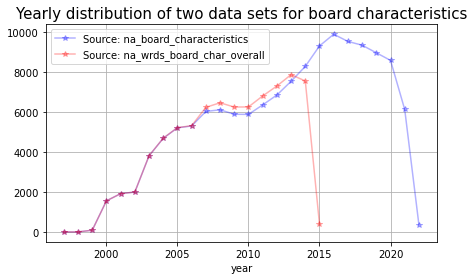

In [35]:
bd_chars_overall.groupby(['year']).count()['id'].plot(kind='line', figsize=(7,4), grid= True, color= 'b', marker='*', label='Source: na_board_characteristics', alpha=0.3)
w_bd_chars.groupby(['year']).count()['id'].plot(kind='line', figsize=(7,4), grid= True, color= 'r', marker='*', label='Source: na_wrds_board_char_overall', alpha=0.3)
plt.title("Yearly distribution of two data sets for board characteristics", fontsize=15)
plt.legend()
plt.show()


* na_board_characteristics - a good one.  
* na_wrds_board_char_overall - not a good one.

--------------------

In [31]:
bd_chars_overall.to_csv("data/board-chars.csv", index= None)

### Close connection

In [32]:
conn.close()

-------------